# Aim: To observe the relation (if any) between entropy and training error.
## 60-40 Division

Steps followed:
    1. Generating a random dataset
    2. Split dataset
    3. Train decision tree classifier, criterion = 'entropy'
    4. Check the outputs for entropy and training error
    
## Results
- Entropy of y = 0.972108503637691
- Train error 0.15375000000000005
- training accuracy score = 0.84625

In [2]:
t_e = 1 - 0.84625
print(t_e)

0.15375000000000005


## Dataset 1 Characteristics:
    - Number of samples: 1000
    - 80/20 split of red and blue dots

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from pyitlib import discrete_random_variable as drv

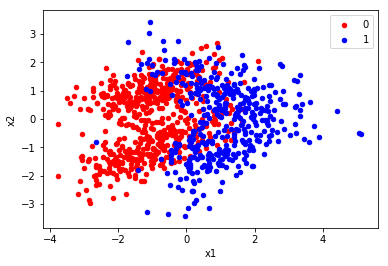

In [21]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
import pandas as pd
from pandas import DataFrame
# 50-50 classes
X, y = make_classification(n_samples = 1000, n_features=2, n_redundant=0, n_informative=2, random_state = 9, weights = [0.6, 0.4])
# scatter plot, dots colored by class value
d = {'x1':X[:,0], 'x2':X[:,1], 'y':y}
df = DataFrame(data = d)
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
pyplot.show()

## Method - 1 
- Sklearn decision tree classifier
- Training error output (no entropy output)

In [22]:
# Splitting dataset to train, test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
# Training decision tree classifier
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, max_leaf_nodes=2)
clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1])

In [24]:
clf.fit(X_train, y_train).score(X_train, y_train)

0.84625

In [19]:
train_errors = list()
#test_errors = list()

#train_errors.append(clf.score(X_train, y_train))
#test_errors.append(clf.score(X_test, y_test))

train_errors.append(clf.fit(X_train, y_train).score(X_train, y_train))

print("Train error",train_errors)
#print(test_errors)

Train error [0.84625]


## Method 2
- Has Entropy output (entropy of y)

In [33]:
def classify_and_accuracy(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("Entropy", drv.entropy(y))
    #print("Entropy of X", drv.entropy(X_train))
    #print("Accuracy ",accuracy_score(y_pred, y_test))
    return(drv.entropy(y), accuracy_score(y_pred, y_test))
    #return(drv.entropy(y), classifier.fit(X_train, y_train).score(X_train, y_train))

#train_errors.append(clf.fit(X_train, y_train).score(X_train, y_train))

In [34]:
acc_list = []
for i in range(10):
    acc_list.append(classify_and_accuracy(X,y))
acc_list

Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691
Entropy 0.972108503637691


[(array(0.9721085), 0.825),
 (array(0.9721085), 0.815),
 (array(0.9721085), 0.825),
 (array(0.9721085), 0.81),
 (array(0.9721085), 0.82),
 (array(0.9721085), 0.805),
 (array(0.9721085), 0.805),
 (array(0.9721085), 0.825),
 (array(0.9721085), 0.83),
 (array(0.9721085), 0.845)]